## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

In [25]:
%load_ext autoreload
%autoreload 2

import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import cv2

# # check whether run in Colab
# if 'google.colab' in sys.modules:
#     print('Running in Colab.')
#     !pip3 install timm==0.4.5  # 0.3.2 does not work in Colab
#     !git clone https://github.com/facebookresearch/mae.git
#     sys.path.append('./mae')
# else:
#     sys.path.append('..')
sys.path.append('..')
import models_mae
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load an image

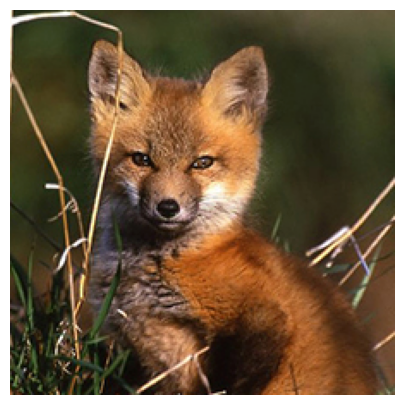

In [26]:
# load an image
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img = load_image_from_url(img_url)

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

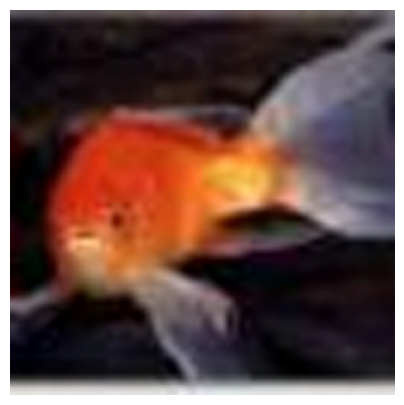

In [27]:
img2 = load_image_from_file("../images/n01443537_464.JPEG")
show_image(torch.tensor(img2))

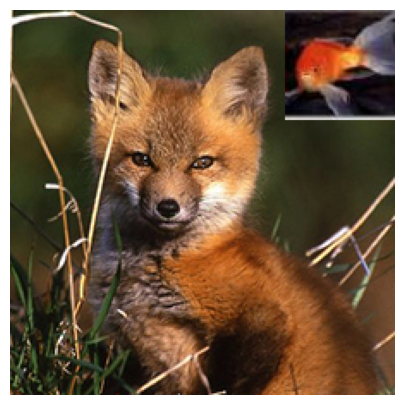

In [28]:
img3 = place_image(img, img2, size=64, position='topright')
show_image(torch.tensor(img3))

### Load a pre-trained MAE model

In [29]:
# This is an MAE model trained with pixels as targets for visualization (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
# !wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_base.pth

chkpt_dir = '../checkpoints/mae_visualize_vit_base.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_base_patch16')
print('Model loaded.')


<All keys matched successfully>
Model loaded.


### Run MAE on the image

In [30]:
# # make random mask reproducible (comment out to make it change)
# torch.manual_seed(2)
# print('MAE with pixel reconstruction:')
# x, im_masked, y, im_paste = run_one_image(img3, model_mae, mask_ratio=0.0)

In [31]:
fish1 = load_image_from_file("../images/n01443537_464.JPEG")
fish2 = load_image_from_file("../images/n01443537_485.JPEG")
dog1 = load_image_from_file("../images/n02085620_40.JPEG")
dog2 = load_image_from_file("../images/n02085620_419.JPEG")

In [32]:
fish_folder = '../data/tiny-224/test/n01443537/images'
bird1_folder = '../data/tiny-224/test/n01855672/images'
bird2_folder = '../data/tiny-224/test/n02002724/images'
bird3_folder = '../data/tiny-224/test/n02056570/images'
dog1_folder = '../data/tiny-224/test/n02099601/images'
dog2_folder = '../data/tiny-224/test/n02094433/images'
dog3_folder = '../data/tiny-224/test/n02085620/images'

# read all the jpeg images in these folders and put them in their respective lists
# create a list of all the images in the folder
fish_images = [load_image_from_file(os.path.join(fish_folder, img)) for img in os.listdir(fish_folder) if img.endswith('.JPEG')]
bird1_images = [load_image_from_file(os.path.join(bird1_folder, img)) for img in os.listdir(bird1_folder) if img.endswith('.JPEG')]
bird2_images = [load_image_from_file(os.path.join(bird2_folder, img)) for img in os.listdir(bird2_folder) if img.endswith('.JPEG')]
bird3_images = [load_image_from_file(os.path.join(bird3_folder, img)) for img in os.listdir(bird3_folder) if img.endswith('.JPEG')]
dog1_images = [load_image_from_file(os.path.join(dog1_folder, img)) for img in os.listdir(dog1_folder) if img.endswith('.JPEG')]
dog2_images = [load_image_from_file(os.path.join(dog2_folder, img)) for img in os.listdir(dog2_folder) if img.endswith('.JPEG')]
dog3_images = [load_image_from_file(os.path.join(dog3_folder, img)) for img in os.listdir(dog3_folder) if img.endswith('.JPEG')]


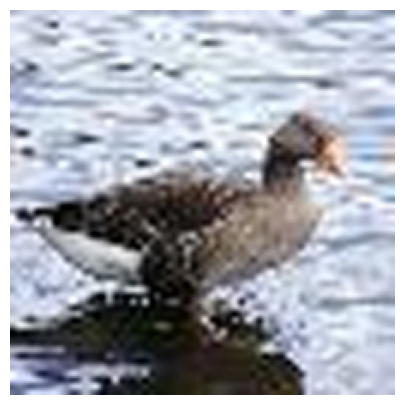

In [33]:
show_image(torch.tensor(bird1_images[1]))

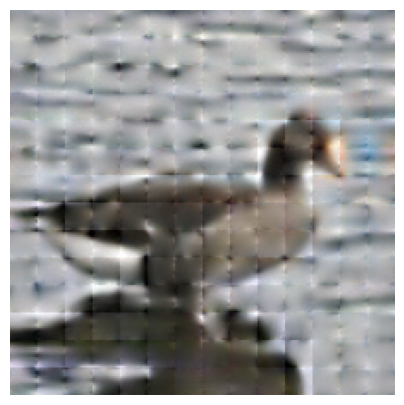

In [34]:
# embed, latent, mask, ids_restore = get_features_from_image(img, model_mae)
latent, _, ids_restore = get_features_from_image(bird1_images[1], model_mae)
fish1_y = reconstruct_image_from_features(latent, ids_restore, model_mae, show=True)[0]


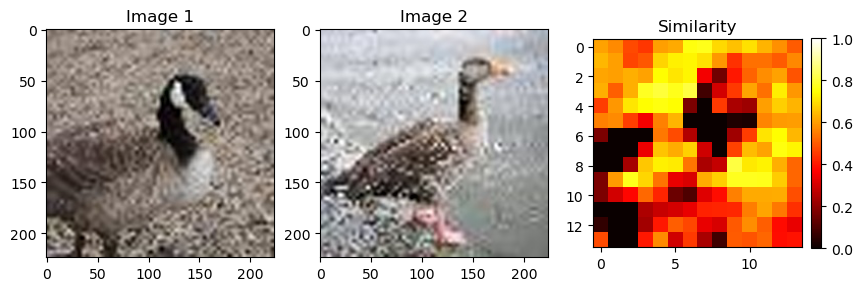

In [35]:
_ = calculate_similarity_images(bird1_images[2], bird1_images[8], model_mae, type='cosine', show=True)

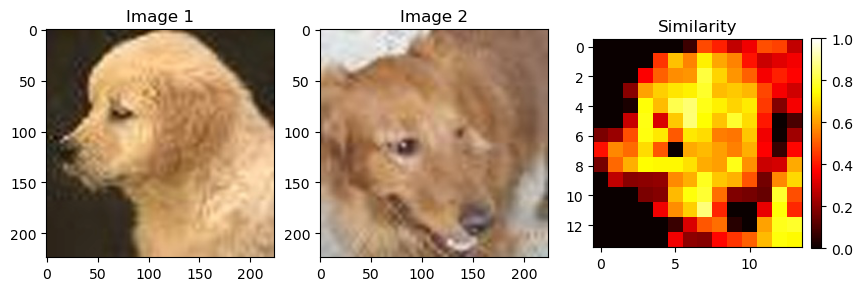

In [36]:
_, x1, x2, ids_restore= calculate_similarity_images(dog1_images[2], dog1_images[7], model_mae, type='cosine', show=True)

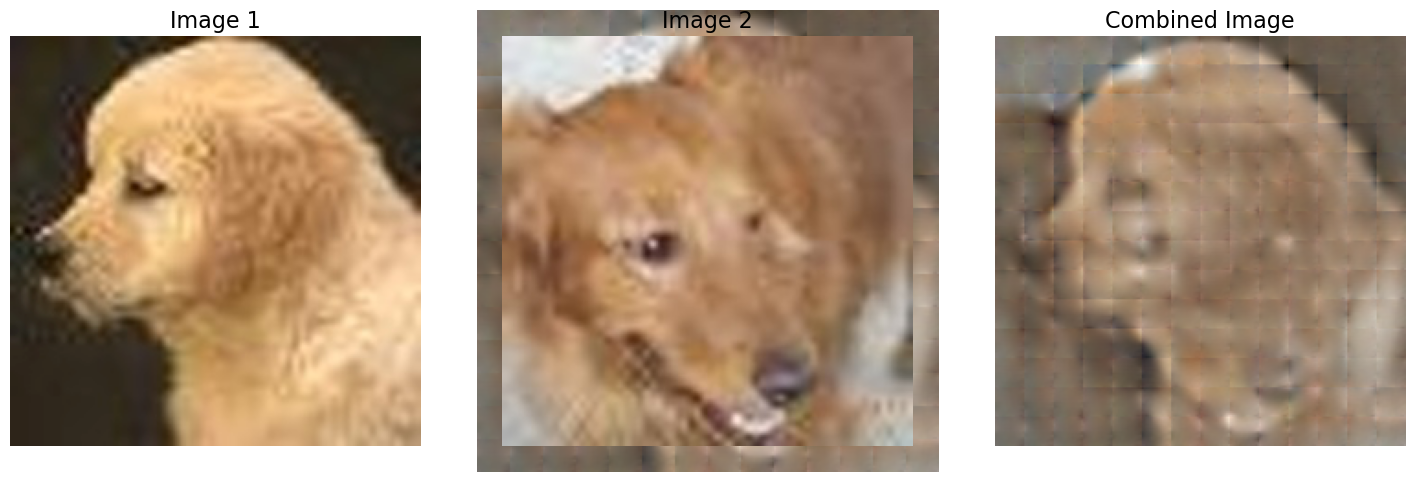

In [38]:
y, latent = combine_image_in_latent_space(dog1_images[2], dog1_images[7], model_mae, alpha=0.5, show=True)